In [1]:
import numpy as np

In [4]:
"""
This RNN takes as input a sequence of vectors, which 
you'll encode as a 2D tensor of size (timesteps, input_features).
It loops over timesteps, and at each timestep, it considers its 
current state at t and the input at t (of shape input_features)
and combines them to obtain the output at t. 
Then the state for the next step is set to be this previous output.

For the first tiimestep, the previous output isnt defined=>
no current state => this initial state is initialized as an 
all zero vector called the initial state of the network
"""
# Nr of timesteps in the input sequence
timesteps = 100
# Dimensionality of the input feature space
input_features = 32
# Dimensionality of the output feature space
output_features = 64

# Input data; random noise for the sake of the example;lol
inputs = np.random.random((timesteps, input_features))

# Initial state; an all-zero vector
state_t = np.zeros((output_features,))

# Creating random weight matrices
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []


state_t = 0
# Input_t is a vector of shape(input_features,)
for input_t in inputs:
    # Combines the input with the current state (previous output)
    # to obtain the current output
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # Stores this output in a list
    successive_outputs.append(output_t)
    # Updates the state of the network for the next timestep
    state_t = output_t 
    
"""
Updates the state of the network for the next timestep
The final output is a 2D tensor of shape (timesteps, output_features)
"""
final_output_sequence = np.concatenate(successive_outputs, axis=0)    

"""
All in all, an RNN is a for loop that reuses quantities computed
during the previous iteration of the loop, nothing more; 


The above for-loop corresponds to a Keras layer:
    SimpleRNN
"""



'\nAll in all, an RNN is a for loop that reuses quantities computed\nduring the previous iteration of the loop, nothing more; \n\n\nThe above for-loop corresponds to a Keras layer:\n    SimpleRNN\n'

In [5]:
from keras import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential()
model.add(Embedding(10000, 32))
# Returns the full state of sequences
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Sometimes its useful to stack several recurrent layers one
after the other in order to increase the representational power of
a network. 
In such a setup, you have to get all of the intermediate layers
to return full sequence of outputs:
"""

model = Sequential()
model.add(Embedding(10000, 32))
# Returns the full state of sequences
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

Loading data...
17465344/17464789 [==============================] - 126s 7us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6452 - acc: 0.6108 - val_loss: 0.5881 - val_acc: 0.6796
Epoch 2/10
20000/20000 [==============================] - 20s 1ms/step - loss: 0.4312 - acc: 0.8146 - val_loss: 0.4037 - val_acc: 0.8260
Epoch 3/10
20000/20000 [==============================] - 20s 977us/step - loss: 0.3034 - acc: 0.8802 - val_loss: 0.3440 - val_acc: 0.8620
Epoch 4/10
20000/20000 [==============================] - 19s 973us/step - loss: 0.2371 - acc: 0.9093 - val_loss: 0.5420 - val_acc: 0.7826
Epoch 5/10
20000/20000 [==============================] - 18s 901us/step - loss: 0.1898 - acc: 0.9276 - val_loss: 0.3575 - val_acc: 0.8692
Epoch 6/10
20000/20000 [================

In [11]:
"""
2 otehr RNN layers in keras are: LSTM and GRU
In practice, you'll always sue one of these, because SimpleRNN
is generally too simplistic for real use.

The chief problem of RNN is that theoretically it should be able to 
retain at time t information about inputs seen many timesteps before, 
in practice, such long-term dependecies are impossible to learn. 

This is due to the ___Vanishing Gradient___ issue; which occurrs even
in feedforward networks that are too deep:
    because as you add layers to the network, it becomes untrainable

The famous LSTM, adds a way to carry information across multiple 
timesteps. 
It saves information for later, thus preventing older signals
from gradually vanishing during preprocessing. 
   
   
LSTM in Keras :DDDDDDDDDD
"""
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="rmsprop", 
             loss="binary_crossentropy",
             metrics=["acc"])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.5094 - acc: 0.7609 - val_loss: 0.3735 - val_acc: 0.8622
Epoch 2/10
20000/20000 [==============================] - 56s 3ms/step - loss: 0.2887 - acc: 0.8879 - val_loss: 0.3702 - val_acc: 0.8336
Epoch 3/10
20000/20000 [==============================] - 50s 2ms/step - loss: 0.2356 - acc: 0.9107 - val_loss: 0.3380 - val_acc: 0.8820
Epoch 4/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1972 - acc: 0.9259 - val_loss: 0.4017 - val_acc: 0.8644
Epoch 5/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.1721 - acc: 0.9375 - val_loss: 0.3502 - val_acc: 0.8738
Epoch 6/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1544 - acc: 0.9443 - val_loss: 0.4235 - val_acc: 0.8576
Epoch 7/10
20000/20000 [==============================] - 52s 3ms/step - loss: 0.1415 - acc: 0.9493 - val_loss: 0.3020 - val_acc:

In [13]:
# LSTM => 89% accuracy!!

"""
Preprocess the data to a format a neural network can digest. 
If data is numerical no vectorization is needed. 
But each timeseries in the data is on a different scale
    => Data should be normalized; 
The timeseries should be normalized independently so that the values 
they take are on a similar scale
"""
import os

data_dir = "/home/kejsi/Downloads/jena_climate"
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split("\n")
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420551


In [15]:
# Convert all lines into a numpy array
import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

In [16]:
from matplotlib import pyplot as plt
temp = float_data[:, 1] # temperature (in degrees Celsius)
plt.plot(range(len(temp)), temp)

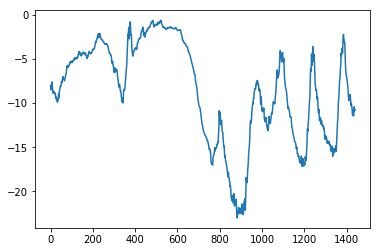

In [17]:
plt.plot(range(1440), temp[:1440])

In [18]:
# Preparing the data
"""
The exact formulation of the problem will be as follows: given data going as far back
as lookback timesteps (a timestep is 10 minutes) and sampled every steps timesteps,
can you predict the temperature in delay timesteps? You’ll use the following parameter values
"""
lookback = 720 # Observations will go back 5 days??
steps = 6 # Observations will be sampled at one data point per hour
delay = 144 # Targets will be 24 hours in the future
"""
Two Things are needed though:
1. Preprocess the data to a format a neural network can ingest. 
This is easy: the data is already numerical, so you dont need 
any vectorization. But each timeseries in the data is on a 
different scale => normalize timeseries INDEPENDENTLY!!!so as to take 
small values in similar scale

2. Python generator that takes the current array of float
data and yields batches of data from the recent past, along with 
a temp in the future. 
Because the samples in the dataset are highly redundant 
it would be wasteful to explicitly allocate each sample; 
Instead, you'll generate the samples on the fly using the original 
data

The data will be preprocessed by subtracting the mean 
of each timeseries and dividing by the standard deviation. 
We'll use the first 200.000 timesteps as training data, 
so compute the mean and std only on this fraction of data. 
"""

# normalizing:
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std



In [19]:
# Listing 6.33 shows the data generator you’ll use. It yields a tuple (samples, targets),
# where samples is one batch of input data and targets is the corresponding array of
# target temperatures. It takes the following arguments
def generator(data, lookback, delay, min_index, max_index,
             shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
            min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
                rows = np.arange(i, min(i + batch_size, max_index))
                i += len(rows)
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets


In [20]:
"""
Now, let’s use the abstract generator function to instantiate three generators: one for
training, one for validation, and one for testing. Each will look at different temporal
segments of the original data: the training generator looks at the first 200,000 timesteps, the validation generator looks at the following 100,000, and the test generator
looks at the remainder.

"""

'\nNow, let’s use the abstract generator function to instantiate three generators: one for\ntraining, one for validation, and one for testing. Each will look at different temporal\nsegments of the original data: the training generator looks at the first 200,000 timesteps, the validation generator looks at the following 100,000, and the test generator\nlooks at the remainder.\n\n'

In [21]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

In [22]:
train_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=0,
                        max_index=200000,
                        shuffle=True,
                        step=step,
                        batch_size=batch_size)

In [23]:
val_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=200001,
                        max_index=300000,
                        step=step,
                        batch_size=batch_size)

test_gen = generator(float_data,
                        lookback=lookback,
                        delay=delay,
                        min_index=300001,
                        max_index=None,
                        step=step,
                        batch_size=batch_size)

In [24]:
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [25]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Flatten(input_shape=(lookback // step, float_data.shape[-1])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))


In [26]:
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps)

Epoch 1/20
495/500 [============================>.] - ETA: 0s - loss: 1.4918

UnboundLocalError: local variable 'rows' referenced before assignment

In [27]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.GRU(32,
                        dropout=0.2,
                        recurrent_dropout=0.2,
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                                steps_per_epoch=500,
                                epochs=40,
                                validation_data=val_gen,
                                validation_steps=val_steps)

Epoch 1/40
358/500 [====================>.........] - ETA: 17s - loss: 0.3539

KeyboardInterrupt: 